In [4]:
# imports
# import imageio
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [9]:
# newt task setup

newt_labels_fp = "data/newt/newt2021_labels.csv"
newt_image_dir = "data/newt/newt2021_images/"

newt_df = pd.read_csv(newt_labels_fp)
newt_df['filepath'] = newt_df['id'].apply(
    lambda image_id: os.path.join(newt_image_dir, image_id + ".jpg")
)
newt_df


,id,task_cluster,task_subcluster,task,label,text_label,split,height,width,filepath
0,dfdabe25-c369-4301-bd56-9d8cc319767c,context,NaN,ml_bio_raptor_utility_pole,1,raptor_on_pole,train,480,640,data/newt/newt2021_images/dfdabe25-c369-4301-b...
1,a2675dad-2eab-4a7e-945d-78a1dad8140e,context,NaN,ml_bio_raptor_utility_pole,1,raptor_on_pole,train,427,640,data/newt/newt2021_images/a2675dad-2eab-4a7e-9...
2,e7a2e78b-d8e1-450d-884d-db7cc600b701,context,NaN,ml_bio_raptor_utility_pole,1,raptor_on_pole,train,426,640,data/newt/newt2021_images/e7a2e78b-d8e1-450d-8...
3,00eb2072-a9b7-4f09-83ea-c8c2dfca4f15,context,NaN,ml_bio_raptor_utility_pole,1,raptor_on_pole,train,452,640,data/newt/newt2021_images/00eb2072-a9b7-4f09-8...
4,c0847250-62e4-4674-8d90-1162ee5c5c41,context,NaN,ml_bio_raptor_utility_pole,1,raptor_on_pole,train,427,640,data/newt/newt2021_images/c0847250-62e4-4674-8...
...,...,...,...,...,...,...,...,...,...,...
36027,29723442-b01f-4a1a-b709-6f1ae2693d57,appearance,species,inat_observed_Brown_House_Spider_vs_False_Blac...,0,Brown House Spider,test,427,500,data/newt/newt2021_images/29723442-b01f-4a1a-b...
36028,57034810-bd4f-4002-aafc-6142493be095,appearance,species,inat_observed_Brown_House_Spider_vs_False_Blac...,1,False Black Widow,test,375,500,data/newt/newt2021_images/57034810-bd4f-4002-a...
36029,21968f85-5fef-4603-8f4d-9586af0fdd5d,appearance,species,inat_observed_Brown_House_Spider_vs_False_Blac...,0,Brown House Spider,test,379,500,data/newt/newt2021_images/21968f85-5fef-4603-8...
36030,b41ddeeb-f542-415e-987a-122516dd25c4,appearance,species,inat_observed_Brown_House_Spider_vs_False_Blac...,0,Brown House Spider,test,375,500,data/newt/newt2021_images/b41ddeeb-f542-415e-9...


(20, 10) (20, 10)


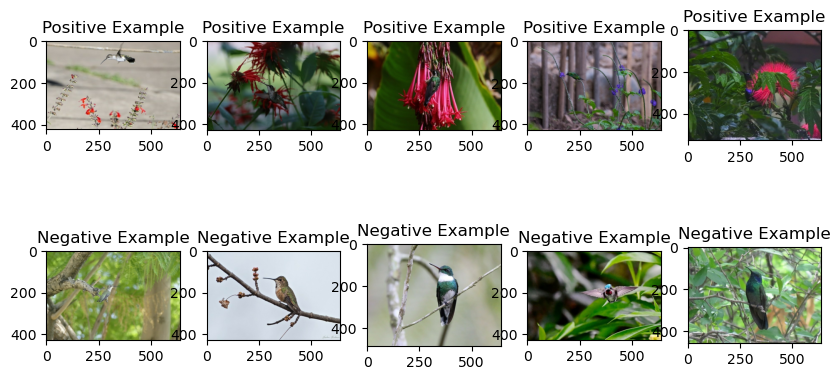

In [15]:
test_df = newt_df.loc[newt_df['split'] == 'test']
# print(test_df['text_label'].unique())
# test_df['text_label'][ ].unique()
n_imgs = 20
positives = test_df.loc[test_df['text_label'] == 'is_at_flower'].sample(n_imgs)
negatives = test_df.loc[test_df['text_label'] == 'not_at_flower'].sample(n_imgs)
print(positives.shape, negatives.shape)
# visualize some images from positive and negative classes
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(min(n_imgs, 5)):
    ax[0, i].imshow(mpimg.imread(positives['filepath'].values[i]))
    ax[1, i].imshow(mpimg.imread(negatives['filepath'].values[i]))
    ax[0, i].set_title('Positive Example')
    ax[1, i].set_title('Negative Example')